## Analyzing profiltability of mobile prepaid plans

Two prepaid plans offered by a state mobile operator will be analyzed to determine which of the two plans is more profitable. The results will be based on the behavior data of 500 clients.

### Step 1. Open the data file and study the general information.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from scipy import stats as st

In [ ]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')

In [ ]:
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

In [ ]:
df_messages = pd.read_csv('/datasets/megaline_messages.csv')

In [ ]:
df_tariffs = pd.read_csv('/datasets/megaline_tariffs.csv')

In [ ]:
df_users = pd.read_csv('/datasets/megaline_users.csv')

In [ ]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


`call_date` would be better suited as a datetime column instead of an object column, since the column only contains dates.

In [ ]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Since `session_date` only contains dates, it would be better if it were converted into a datetime column.

In [ ]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Column `message_date` is better as a datetime column instead of an object column.

In [ ]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Columns `reg_date` and `churn_date` is better converted from an object datatype to a datetime datatype.

Null values in `churn_date` indicate that the calling plan was active at the moment of data extraction and should be filled with a placeholder value.

### Conclusion

5 datasets were opened and analyzed for general information. 5 necessary datatype conversions were found.

In the `df_calls` dataset, `call_date` would be better suited as a datetime column instead of an object column, since the column only contains dates.

In the `df_internet` dataset, `session_date` also only contains dates. It would be better if it were converted into a datetime column.

In the `df_messages` dataset, `message_date` is better as a datetime column instead of as an object column.

No initial changes can be seen for the `df_tariffs` dataset for now.

In the `df_users` dataset, `reg_date` and `churn_date` is better converted from an object datatype to a datetime datatype. Null values in `churn_date` indicate that the calling plan was active at the moment of data extraction.

### Step 2. Data preprocessing

#### Converting the data to the necessary types

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [ ]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [ ]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [ ]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

#### Finding and removing errors in the data

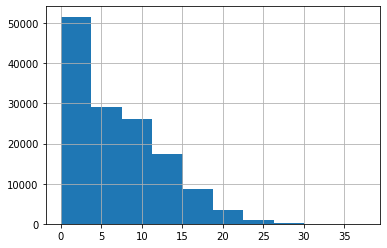

In [ ]:
df_calls['duration'].hist()

In [ ]:
df_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [ ]:
df_calls['duration'].value_counts()

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64

In [ ]:
df_calls.loc[df_calls['duration'] == 0].head()

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0


In [ ]:
df_calls.loc[df_calls['duration'] == 0].tail()

,id,user_id,call_date,duration
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0
137725,1499_194,1499,2018-10-31,0.0


Records containing 0 duration calls comprise 19.48% of the df_calls dataset. There does not appear to be a common secondary attribute between all of the 0 duration records.

In [ ]:
df_calls.pivot_table(index='user_id', values='duration', aggfunc='median').sort_values(by='duration')

,duration
user_id,
1104,1.160
1306,2.230
1034,2.655
1286,3.630
1186,3.680
...,...
1484,8.440
1260,8.475
1135,8.550


In [ ]:
for user in df_calls['user_id'].unique():
    df_calls.loc[df_calls['user_id'] == user, 'duration'] = df_calls.loc[df_calls['user_id'] == user, 'duration'].replace(0, df_calls.loc[df_calls['user_id'] == user, 'duration'].median())

Since phone usage may vary by user due to reasons such as occupation (for example, salespeople may have higher phone usage than retail associates), 0 duration values have been replaced with the median duration value based on each individual user.

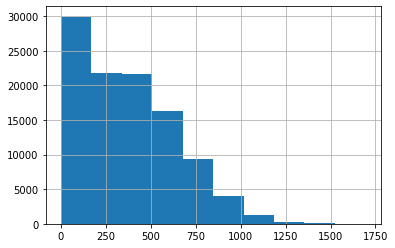

In [ ]:
df_internet['mb_used'].hist()

In [ ]:
df_internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [ ]:
df_internet['mb_used'].value_counts()

0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64

In [ ]:
df_internet.loc[df_internet['mb_used'] == 0].head()

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0


Records containing 0 megabytes used comprise 13.11% of the df_internet dataset. There does not appear to be a common secondary attribute between the 0 megabyte records.

In [ ]:
df_internet.pivot_table(index='user_id', values='mb_used', aggfunc='median').sort_values(by='mb_used', ascending=False)

,mb_used
user_id,
1340,777.970
1124,697.610
1429,612.430
1479,590.555
1360,587.480
...,...
1344,169.530
1372,163.610
1108,116.585


In [ ]:
for user in df_internet['user_id'].unique():
    df_internet.loc[df_internet['user_id'] == user, 'mb_used'] = df_internet.loc[df_internet['user_id'] == user, 'mb_used'].replace(0, df_internet.loc[df_internet['user_id'] == user, 'mb_used'].median())

Since data usage may vary by user due to reasons such as occupation or entertainment preferences (some users may enjoy streaming videos on their phones or play online mobile games more than others), 0 duration values have been replaced with the median duration value based on each individual user.

#### Determining user activity

In [ ]:
df_calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

In [ ]:
df_messages['message_date'].max()

Timestamp('2018-12-31 00:00:00')

In [ ]:
df_internet['session_date'].max()

Timestamp('2018-12-31 00:00:00')

The latest record in the provided datasets take place on December 31, 2018.

In [ ]:
df_users['end_date'] = df_users['churn_date'].fillna(pd.to_datetime('2018-12-31'))

In [ ]:
df_users['months_active'] = np.ceil((df_users['end_date'] - df_users['reg_date']).dt.days / 30).astype(int)

`months_active` is rounded up because users typically pay for plans by whole month.

In [ ]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,end_date,months_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12-31,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-12-31,5
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-12-31,3
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-12-31,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-12-31,8


#### Determining the number of calls made and minutes spent per month, per user

In [ ]:
df_calls['month'] = df_calls['call_date'].dt.month

In [ ]:
calls_count = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='count').rename(columns={'duration':'call_count'})

In [ ]:
calls_count.head()

call_count
user_id month            
1000    12             16
1001    8              27
        9              49
        10             65
        11             64

In [ ]:
calls_minutes = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').rename(columns={'duration':'call_minutes'})

In [ ]:
calls_minutes.head()

call_minutes
user_id month              
1000    12           116.83
1001    8            199.89
        9            360.94
        10           477.61
        11           490.84

#### Determining the number of SMS sent per month, per user

In [ ]:
df_messages['month'] = df_messages['message_date'].dt.month

In [ ]:
messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').rename(columns={'id':'message_count'})

In [ ]:
messages.head()

message_count
user_id month               
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36

#### Determining the volume of web traffic per month, per user

In [ ]:
df_internet['month'] = df_internet['session_date'].dt.month

In [ ]:
internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [ ]:
internet.head()

mb_used
user_id month          
1000    12      2172.46
1001    8       8099.79
        9      17151.90
        10     24691.77
        11     19389.78

#### Determining the monthly profit from each of the users

In [ ]:
breakdown = pd.concat([calls_count, calls_minutes, messages, internet], axis=1).reset_index()

`calls_count`, `calls_minutes`, `message_count`, `mb_used` are combined to create a new dataframe called `breakdown`.

In [ ]:
breakdown.isna().sum()

user_id            0
month              0
call_count        35
call_minutes      35
message_count    487
mb_used           16
dtype: int64

In [ ]:
breakdown.fillna(0, inplace=True)

Null values in `call_count`, `call_minutes`, `message_count`, and `mb_used` indicate that the users involved have no such usage records for a specific month. These null values are replaced with 0's to make the data clearer.

In [ ]:
plan_dict = df_users[['user_id', 'tariff']].set_index('user_id')
plan_dict = plan_dict['tariff'].to_dict()

In [ ]:
def apply_plan(row):
    return plan_dict[row['user_id']]

breakdown['plan'] = breakdown.apply(apply_plan, axis=1)

`breakdown['plan']` is created based on a dictionary of all users and their plans obtained from `df_users`.

In [ ]:
def month_profit(row):
    if row['plan'] == "surf":
        return calculate(row, 0)
    else:
        return calculate(row, 1)

def calculate(row, plan):
    total = df_tariffs.loc[plan, 'usd_monthly_pay']
        
    minutes = row['call_minutes'] - df_tariffs.loc[plan, 'minutes_included']
    messages = row['message_count'] - df_tariffs.loc[plan, 'messages_included']
    data = row['mb_used'] - df_tariffs.loc[plan, 'mb_per_month_included']
        
    if minutes > 0:
        total += minutes * df_tariffs.loc[plan, 'usd_per_minute']
            
    if messages > 0:
        total += messages * df_tariffs.loc[plan, 'usd_per_message']
            
    if data > 0:
        total += data / 1024 * df_tariffs.loc[plan, 'usd_per_gb']
            
    return total

breakdown['profit'] = breakdown.apply(month_profit, axis=1)

In [ ]:
breakdown['profit'] = breakdown['profit'].astype(float).round(2)

`breakdown['profit']` is calculated by taking each user's base plan cost and adding any overages to it. The result is rounded to the nearest cent.

#### Determining amount of months where a user has paid for a plan but did not use it for the month

In [ ]:
user_dict = breakdown['user_id'].value_counts().to_dict()

Transforms user_id value counts into a dictionary

In [ ]:
def find_unaccounted(row):
    if row['user_id'] in user_dict.keys():
        return row['months_active'] - user_dict[row['user_id']]
    else:
        return row['months_active']

df_users['unaccounted_months'] = df_users.apply(find_unaccounted, axis=1)

In [ ]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,end_date,months_active,unaccounted_months
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12-31,1,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-12-31,5,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-12-31,3,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-12-31,12,11
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-12-31,8,0


`df_users['unaccounted_months']` contains the amount of months a user has paid for a plan but did not make any phone calls, send any SMS, or use the plan's internet.

#### Adding paid, unused months into `breakdown`

In [ ]:
def list_months(row):
    if row['unaccounted_months'] > 0:
        months = []
        current_month = row['reg_date'].month
        unaccounted_counter = row['unaccounted_months']

        while (unaccounted_counter > 0) & (current_month < 13):
            if breakdown.loc[(breakdown['user_id'] == row['user_id']) & (breakdown['month'] == current_month)].empty:
                months.append(current_month)
                unaccounted_counter -= 1
            
            current_month += 1
        
        return months if months else None
    else:
        return None
    

df_users['unacc_list'] = df_users.apply(list_months, axis=1)

In [ ]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,end_date,months_active,unaccounted_months,unacc_list
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12-31,1,0,None
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-12-31,5,0,None
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-12-31,3,0,None
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-12-31,12,11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-12-31,8,0,None


`df_users['unacc_list']` is created, containing the exact months where a user has paid for a plan but did not make any phone calls, send any SMS, or use the plan's internet.

In [ ]:
for index, row in df_users.iterrows():
    if row['unacc_list']:
        if row['tariff'] == "surf":
            plan = df_tariffs.loc[0, 'usd_monthly_pay']
        else:
            plan = df_tariffs.loc[1, 'usd_monthly_pay']
            
        for month in row['unacc_list']:
            breakdown = breakdown.append({'user_id': row['user_id'],
                                          'month': month,
                                          'call_count': 0,
                                          'call_minutes': 0,
                                          'message_count': 0,
                                          'mb_used': 0,
                                          'plan': row['tariff'],
                                          'profit': plan}, ignore_index=True)

Data for unused, paid months are added into breakdown.

In [ ]:
breakdown.head()

,user_id,month,call_count,call_minutes,message_count,mb_used,plan,profit
0,1000,12,16.0,116.83,11.0,2172.46,ultimate,70.00
1,1001,8,27.0,199.89,30.0,8099.79,surf,20.00
2,1001,9,49.0,360.94,44.0,17151.90,surf,37.50
3,1001,10,65.0,477.61,53.0,24691.77,surf,111.22
4,1001,11,64.0,490.84,36.0,19389.78,surf,59.35


In [ ]:
breakdown.tail()

,user_id,month,call_count,call_minutes,message_count,mb_used,plan,profit
3316,1496,7,0.0,0.0,0.0,0.0,surf,20.0
3317,1499,5,0.0,0.0,0.0,0.0,surf,20.0
3318,1499,6,0.0,0.0,0.0,0.0,surf,20.0
3319,1499,7,0.0,0.0,0.0,0.0,surf,20.0
3320,1499,8,0.0,0.0,0.0,0.0,surf,20.0


### Conclusion

5 columns - `df_calls['call_date']`, `df_internet['session_date']`, `df_messages['message_date']`, `df_users['reg_date']`, and `df_users['churn_date']` were converted from an object column datatype to a datetime column datatype.

19.48% of `df_calls['duration']` and 13.11% of `df_internet['mb_used']` contained values with the number 0 which were replaced with the median value based on each individual user, since users may have different lifestyles and preferences that can influence the way they use their phones.

Null values in `df_users['end_date']` indicate that the plan was active at the moment of data extraction, and are filled in with the latest recorded date fron the dataset records.

`df_users['months_active']` was created to determine the amount of months the user has been active on the plan. The values were rounded up because customers typically pay for plans by whole month.

Pivot tables were created to determine:
1. The number of calls made, for each user
2. The number of minutes spent per month, for each user
3. The number of SMS sent per month, for each user
4. The volume of web traffic per month, for each user

The resulting tables - `calls_count`, `calls_minutes`, `messages`, `internet` were then consolidated into a new dataframe called `breakdown`. Null values in `call_count`, `call_minutes`, `message_count`, and `mb_used` indicate that the users involved have no such usage records for a specific month. These null values were replaced with 0's to make the data clearer.

`breakdown['plan']` was created based on a dictionary of all users and their phone plans obtained from `df_users`. Values from `breakdown` and `df_tariffs` were used to calculate the monthly profit for each user, which are saved into `breakdown['profit']` rounded to the nearest cent.

Next, records where the user has paid for a plan but did not use it for the according month were determined and added into `breakdown`. Two columns were added to `df_users` in order to make the process smoother:

`df_users['unaccounted_months']` contains the amount of months a user has paid for a plan but did not make any phone calls, send any SMS, or use the plan's internet.

`df_users['unacc_list']` contains the exact months where a user has paid for a plan but did not make any phone calls, send any SMS, or use the plan's internet.

### Step 3. Analyzing the data

#### Analyzing the number of minutes required per month for users of each plan: Surf

In [ ]:
surf_minutes = breakdown.loc[breakdown['plan'] == 'surf'].pivot_table(index='month', values='call_minutes', aggfunc='mean').rename(columns={'call_minutes':'surf_minutes_mean'})

In [ ]:
np.mean(surf_minutes)

surf_minutes_mean    256.998312
dtype: float64

In [ ]:
np.var(surf_minutes)

surf_minutes_mean    21330.67613
dtype: float64

In [ ]:
np.std(surf_minutes)

surf_minutes_mean    146.050252
dtype: float64

In [ ]:
surf_minutes['variance'] = breakdown.loc[breakdown['plan'] == 'surf'].groupby('month')['call_minutes'].var()

In [ ]:
surf_minutes['std'] = breakdown.loc[breakdown['plan'] == 'surf'].groupby('month')['call_minutes'].std()

In [ ]:
surf_minutes

,surf_minutes_mean,variance,std
month,,,
1,15.747586,4119.511019,64.183417
2,49.687119,21727.083677,147.401098
3,93.652022,35403.128788,188.157192
4,158.949713,60409.202122,245.782835
5,230.546993,87067.605828,295.072204
6,255.944778,85139.391363,291.786551
7,296.443990,104086.083491,322.623749
8,315.255171,91115.799918,301.853938
9,353.151190,81028.572757,284.655182


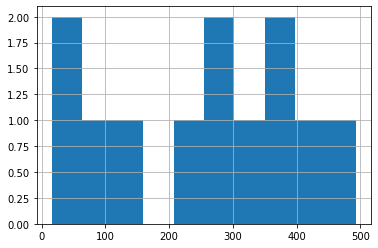

In [ ]:
surf_minutes['surf_minutes_mean'].hist()

In [ ]:
surf_minutes['surf_minutes_mean'].skew()

-0.19727743416554788

The mean, variance, and standard deviation for users on the "surf" plan were calculated by month and also by overall year based on monthly data. The distribution is not strongly skewed.

#### Analyzing the number of minutes required per month for users of each plan: Ultimate

In [ ]:
ultimate_minutes = breakdown.loc[breakdown['plan'] == 'ultimate'].pivot_table(index='month', values='call_minutes', aggfunc='mean').rename(columns={'call_minutes':'ultimate_minutes_mean'})

In [ ]:
np.mean(ultimate_minutes)

ultimate_minutes_mean    252.644449
dtype: float64

In [ ]:
np.var(ultimate_minutes)

ultimate_minutes_mean    17151.551791
dtype: float64

In [ ]:
np.std(ultimate_minutes)

ultimate_minutes_mean    130.963933
dtype: float64

In [ ]:
ultimate_minutes['variance'] = breakdown.loc[breakdown['plan'] == 'ultimate'].groupby('month')['call_minutes'].var()

In [ ]:
ultimate_minutes['std'] = breakdown.loc[breakdown['plan'] == 'ultimate'].groupby('month')['call_minutes'].std()

In [ ]:
ultimate_minutes

,ultimate_minutes_mean,variance,std
month,,,
1,49.434444,12544.934911,112.004174
2,103.654333,56145.574212,236.950573
3,102.407500,45539.754674,213.400456
4,150.997647,50139.550063,223.918624
5,204.880938,75112.261214,274.066162
6,223.499419,70395.322389,265.321168
7,289.005417,106483.553239,326.318178
8,291.589430,92824.242211,304.670711
9,328.299528,98959.683755,314.578581


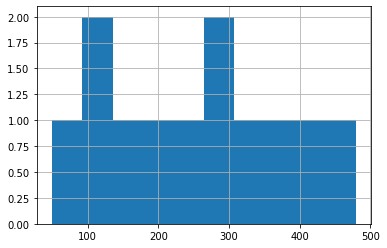

In [ ]:
ultimate_minutes['ultimate_minutes_mean'].hist()

In [ ]:
ultimate_minutes['ultimate_minutes_mean'].skew()

0.13019079617826648

The mean, variance, and standard deviation for users on the "ultimate" plan were calculated by month and also by overall year based on monthly data. Like the minutes data for the "surf" plan, the minutes data for the "ultimate" plan is not strongly skewed.

#### Analyzing the number of SMS required per month for users of each plan: Surf

In [ ]:
surf_sms = breakdown.loc[breakdown['plan'] == 'surf'].pivot_table(index='month', values='message_count', aggfunc='mean').rename(columns={'message_count':'message_count_mean'})

In [ ]:
np.mean(surf_sms)

message_count_mean    16.125493
dtype: float64

In [ ]:
np.var(surf_sms)

message_count_mean    124.702244
dtype: float64

In [ ]:
np.std(surf_sms)

message_count_mean    11.167016
dtype: float64

In [ ]:
surf_sms['variance'] = breakdown.loc[breakdown['plan'] == 'surf'].groupby('month')['message_count'].var()

In [ ]:
surf_sms['std'] = breakdown.loc[breakdown['plan'] == 'surf'].groupby('month')['message_count'].std()

In [ ]:
surf_sms

,message_count_mean,variance,std
month,,,
1,0.724138,15.206897,3.899602
2,1.830508,72.177674,8.495744
3,3.943820,131.780899,11.479586
4,7.131148,276.957865,16.642051
5,12.493243,582.904716,24.143420
6,13.633333,650.613408,25.507125
7,16.113300,725.685119,26.938543
8,19.923077,888.551997,29.808589
9,23.682540,940.217543,30.662967


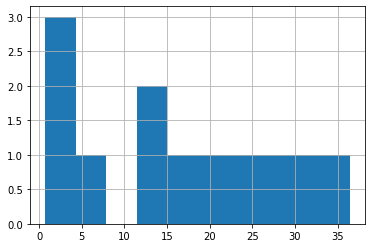

In [ ]:
surf_sms['message_count_mean'].hist()

In [ ]:
surf_sms['message_count_mean'].skew()

0.26103077997970114

Users on the surf plan tend to use a low amount of text messages per month. The data has a very low positive skew.

#### Finding the number of SMS required per month for users of each plan: Ultimate

In [ ]:
ultimate_sms = breakdown.loc[breakdown['plan'] == 'ultimate'].pivot_table(index='month', values='message_count', aggfunc='mean').rename(columns={'message_count':'message_count_mean'})

In [ ]:
np.mean(ultimate_sms)

message_count_mean    19.160996
dtype: float64

In [ ]:
np.var(ultimate_sms)

message_count_mean    139.755787
dtype: float64

In [ ]:
np.std(ultimate_sms)

message_count_mean    11.821835
dtype: float64

In [ ]:
ultimate_sms['variance'] = breakdown.loc[breakdown['plan'] == 'ultimate'].groupby('month')['message_count'].var()

In [ ]:
ultimate_sms['std'] = breakdown.loc[breakdown['plan'] == 'ultimate'].groupby('month')['message_count'].std()

In [ ]:
ultimate_sms

,message_count_mean,variance,std
month,,,
1,3.444444,99.320261,9.965955
2,5.033333,185.067816,13.603963
3,6.075000,272.891667,16.519433
4,9.078431,337.753725,18.378077
5,14.546875,836.029514,28.914175
6,16.034884,679.987004,26.076560
7,20.177083,844.399890,29.058560
8,23.964912,1092.016457,33.045672
9,25.661417,1025.384452,32.021625


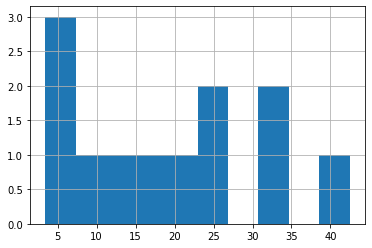

In [ ]:
ultimate_sms['message_count_mean'].hist()

In [ ]:
ultimate_sms['message_count_mean'].skew()

0.40371676803156614

Like users on the surf plan, the data has a very low positive skew.

#### Finding the volume of web traffic required per month for users of each plan: Surf

In [ ]:
surf_traffic = breakdown.loc[breakdown['plan'] == 'surf'].pivot_table(index='month', values='mb_used', aggfunc='mean').rename(columns={'mb_used':'mb_used_mean'})

In [ ]:
np.mean(surf_traffic)

mb_used_mean    9931.479085
dtype: float64

In [ ]:
np.var(surf_traffic)

mb_used_mean    3.388502e+07
dtype: float64

In [ ]:
np.std(surf_traffic)

mb_used_mean    5821.08449
dtype: float64

In [ ]:
surf_traffic['variance'] = breakdown.loc[breakdown['plan'] == 'surf'].groupby('month')['mb_used'].var()

In [ ]:
surf_traffic['std'] = breakdown.loc[breakdown['plan'] == 'surf'].groupby('month')['mb_used'].std()

In [ ]:
surf_traffic

,mb_used_mean,variance,std
month,,,
1,385.031379,2.840298e+06,1685.318381
2,2098.898983,3.269737e+07,5718.160997
3,3861.898090,6.429100e+07,8018.166894
4,5523.853402,7.405106e+07,8605.292636
5,8151.732838,9.886711e+07,9943.194146
6,9239.654056,1.037270e+08,10184.643005
7,11092.395567,1.270390e+08,11271.157424
8,12873.853248,1.326761e+08,11518.512712
9,14237.066627,1.051061e+08,10252.127462


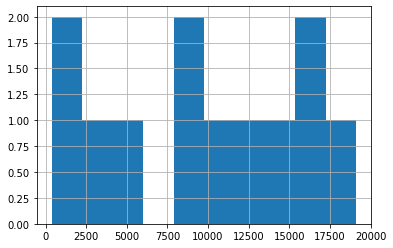

In [ ]:
surf_traffic['mb_used_mean'].hist()

In [ ]:
surf_traffic['mb_used_mean'].skew()

-0.1278107644409718

The data does not have a strong skew.

#### Finding the volume of web traffic required per month for users of each plan: Ultimate

In [ ]:
ultimate_traffic = breakdown.loc[breakdown['plan'] == 'ultimate'].pivot_table(index='month', values='mb_used', aggfunc='mean').rename(columns={'mb_used':'mb_used_mean'})

In [ ]:
np.mean(ultimate_traffic)

mb_used_mean    10283.077846
dtype: float64

In [ ]:
np.var(ultimate_traffic)

mb_used_mean    2.413547e+07
dtype: float64

In [ ]:
np.std(ultimate_traffic)

mb_used_mean    4912.786276
dtype: float64

In [ ]:
ultimate_traffic['variance'] = breakdown.loc[breakdown['plan'] == 'ultimate'].groupby('month')['mb_used'].var()

In [ ]:
ultimate_traffic['std'] = breakdown.loc[breakdown['plan'] == 'ultimate'].groupby('month')['mb_used'].std()

In [ ]:
ultimate_traffic

,mb_used_mean,variance,std
month,,,
1,1664.065833,1.352242e+07,3677.283966
2,4283.795000,7.152056e+07,8456.982740
3,5943.752625,1.312880e+08,11458.095642
4,7311.618529,1.178821e+08,10857.354606
5,8443.907344,1.164963e+08,10793.345032
6,9315.256047,1.162491e+08,10781.888653
7,11058.745521,1.235789e+08,11116.606867
8,12251.649649,1.312887e+08,11458.127606
9,12671.668110,1.127332e+08,10617.589962


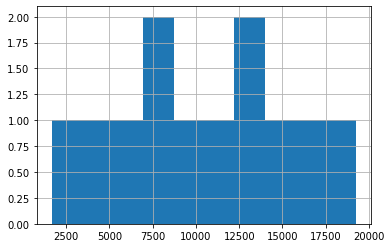

In [ ]:
ultimate_traffic['mb_used_mean'].hist()

In [ ]:
ultimate_traffic['mb_used_mean'].skew()

0.06145455046314724

Like the data from users on the surf plane, the traffic usage of ultimate users does not have a strong skew.

### Conclusion

In terms of the number of minutes used per month, users on both plans use about the same amount of minutes, when comparing their means. 

When comparing the number of SMS used, users on the "ultimate" plan send slightly more than users on the "surf" plan possibly due to the greater plan allowance.

When comparing the amount of web usage per month, users on the "ultimate" plan send slightly more than users on the "surf" plan possibly due to the greater plan allowance.

Usage levels for all three indicators generally increased as the year progressed.

The resulting histograms all resulted in either no skew or a very low skew. 

### Step 4. Testing the hypothesis

#### Test 1. The company earns different amounts from the Ultimate and Surf plans (measured in terms of average monthly revenue)

In [ ]:
surf_profit = breakdown.loc[breakdown['plan'] == 'surf'].pivot_table(index='month', values='profit', aggfunc='mean').rename(columns={'profit':'surf_profit_mean'})

In [ ]:
surf_profit

,surf_profit_mean
month,
1,20.000000
2,23.473559
3,29.064270
4,31.715082
5,39.686486
6,41.664222
7,52.821773
8,58.771838
9,58.530317


In [ ]:
np.mean(surf_profit)[0]

47.585702120265275

In [ ]:
ultimate_profit = breakdown.loc[breakdown['plan'] == 'ultimate'].pivot_table(index='month', values='profit', aggfunc='mean').rename(columns={'profit':'ultimate_profit_mean'})

In [ ]:
ultimate_profit

,ultimate_profit_mean
month,
1,70.000000
2,70.000000
3,72.385250
4,71.751961
5,70.615156
6,70.966395
7,71.476250
8,72.195000
9,71.517874


In [ ]:
np.mean(ultimate_profit)

ultimate_profit_mean    71.597877
dtype: float64

In [ ]:
plan_results = st.ttest_ind(surf_profit['surf_profit_mean'], ultimate_profit['ultimate_profit_mean'], equal_var = False)

alpha = .05

print('p-value: ', plan_results.pvalue)

if (plan_results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We fail to reject the null hypothesis")

p-value:  0.0013504006855838307
We reject the null hypothesis


H0: The company earns the same amount from the Ultimate and Surf plans, in terms of average monthly revenue.

H1: The company earns different amounts from the Ultimate and Surf plans, in terms of average monthly revenue.

`equal_var` is set to False here because those on the Ultimate plan are likely to have a higher variance due to the higher plan allowance per month.

The p-value is less than 0.05, so we reject the null hypothesis. Therefore, the company earns different amounts from the Ultimate and Surf plans, in terms of average monthly revenue.

#### Test 2. The average monthly revenue from users in the NY-NJ area differs from that in other regions

In [ ]:
def set_location(row):
    if df_users.loc[df_users['user_id'] == row['user_id'], 'city'].values[0] == 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        return 1
    else:
        return 0

breakdown['ny_nj_area'] = breakdown.apply(set_location, axis=1)

`breakdown['ny_nj_area']` is created, containing a 1 for users in the NY-NJ area and a 0 for those who are not.

In [ ]:
ny_profit = breakdown.loc[breakdown['ny_nj_area'] == 1].pivot_table(index='month', values='profit', aggfunc='mean').rename(columns={'profit':'ny_mean'})

In [ ]:
ny_profit

,ny_mean
month,
1,31.111111
2,32.391111
3,37.135909
4,38.975333
5,47.772857
6,46.758333
7,54.802692
8,62.670000
9,64.619672


In [ ]:
np.mean(ny_profit)

ny_mean    53.010442
dtype: float64

In [ ]:
non_ny_profit = breakdown.loc[breakdown['ny_nj_area'] == 0].pivot_table(index='month', values='profit', aggfunc='mean').rename(columns={'profit':'non_ny_mean'})

In [ ]:
non_ny_profit

,non_ny_mean
month,
1,41.052632
2,40.871831
3,43.599439
4,44.470839
5,49.270734
6,52.102156
7,59.655061
8,63.266838
9,62.549088


In [ ]:
np.mean(non_ny_profit)

non_ny_mean    56.039536
dtype: float64

In [ ]:
ny_results = st.ttest_ind(ny_profit['ny_mean'], non_ny_profit['non_ny_mean'])

alpha = .05

print('p-value: ', ny_results.pvalue)

if (ny_results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We fail to reject the null hypothesis")

p-value:  0.6152028363865003
We fail to reject the null hypothesis


H0: The average monthly revenue from users in the NY-NJ area equals that in other regions

H1: The average monthly revenue from users in the NY-NJ area differs from that in other regions

`equal_var` is remains as True here because the samples are taken from populations with similar parameters

The p-value is greater than 0.05, so we fail to reject the null hypothesis. Therefore, the average monthly revenue from users in the NY-NJ area equals the average monthly revenue in other regions.

### Conclusion

The SciPy library was imported to help test two hypotheses.

For the first hypothesis test, the average monthly profit for both "ultimate" and "surf" plans were compiled using the pivot table function to form the two data sets. `st.ttest_ind` was used on these two independent statistical populations to test the null hypothesis. The resulting p-value is less than 0.05, so we reject the null hypothesis. Therefore, the company earns different amounts from the Ultimate and Surf plans, in terms of average monthly revenue.

For the second hypothesis test, `breakdown['ny_nj_area']` is created to help differentiate users who are in the NY-NJ area from the rest of the population. The average monthly revenue from both populations were calculated using pivot tables and `st.ttest_ind()` was used on these two independent statistical populations to test the null hypothesis. The resulting p-value is greater than 0.05, so we fail to reject the null hypothesis. Therefore, the average monthly revenue from users in the NY-NJ area  roughly equals the average monthly revenue in other regions.

### Step 5. Overall conclusion

5 datasets were incorporated in this project. Necessary column datatype conversions were performed and gaps in the data were filled in accordingly.

`breakdown` was created, containing monthly metrics for each user such as the number of calls made, the number of call minutes spent, the number of SMS sent, the volumne of web traffic, the calculated monthly profit, the phone plan they are subscribed to, and the profit by month.

It was found that although users on both plans spent the same amount of call minutes on average monthly, users on the "Ultimate" plan send more SMS and use more internet traffic, possibly due to the greater monthly plan allowance. Usage levels for all three indicators generally increased as the year progressed.

Hypothesis tests revealed that the company earns different amounts from the Ultimate and Surf plans in terms of average monthly revenue and that the average monthly revenue from users in the NY-NJ area equals the average monthly revenue in other regions.

The overall plan usage is lower for customers on the "Surf" plan, and has not been great enough to incur too many overuse charges to exceed the profit from users of the "Ultimate" plan. There is greater and more consistent profit to be gained from the "Ultimate" plan, which requires a higher monthly charge.